In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import ast

In [3]:
ROOT = Path().resolve().parent

# load data
enrolments = pd.read_csv(ROOT / "converted-data" / "enrolments.csv")
exams = pd.read_csv(ROOT / "converted-data" / "exams.csv")
students = pd.read_csv(ROOT / "converted-data" / "students.csv")
coincidences = pd.read_csv(ROOT / "converted-data" / "coincidences.csv", index_col=0)
dates = pd.read_csv(ROOT / "converted-data" / "dates.csv")
times_expanded = pd.read_csv(ROOT / "converted-data" / "times_expanded.csv")


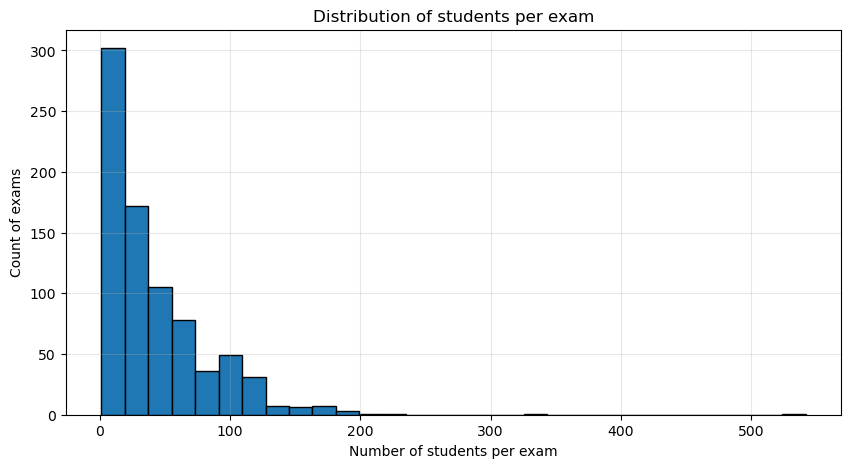

In [4]:
# count unique students per exam
exam_counts = (
    enrolments.groupby("exam")["student"]
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
plt.hist(
    exam_counts,
    bins=30,
    edgecolor='black',
    linewidth=1.0
)

plt.xlabel("Number of students per exam")
plt.ylabel("Count of exams")
plt.title("Distribution of students per exam")
plt.grid(alpha=0.3)
plt.show()



In [5]:
exam_counts

exam
HGAEM2E1    542
HGBEM3E1    340
G111GBE1    222
C71101E1    205
R11001E1    191
           ... 
D23342E1      1
V6B310E1      1
V6B335E1      1
D21102E1      1
F13I06E1      1
Name: student, Length: 800, dtype: int64

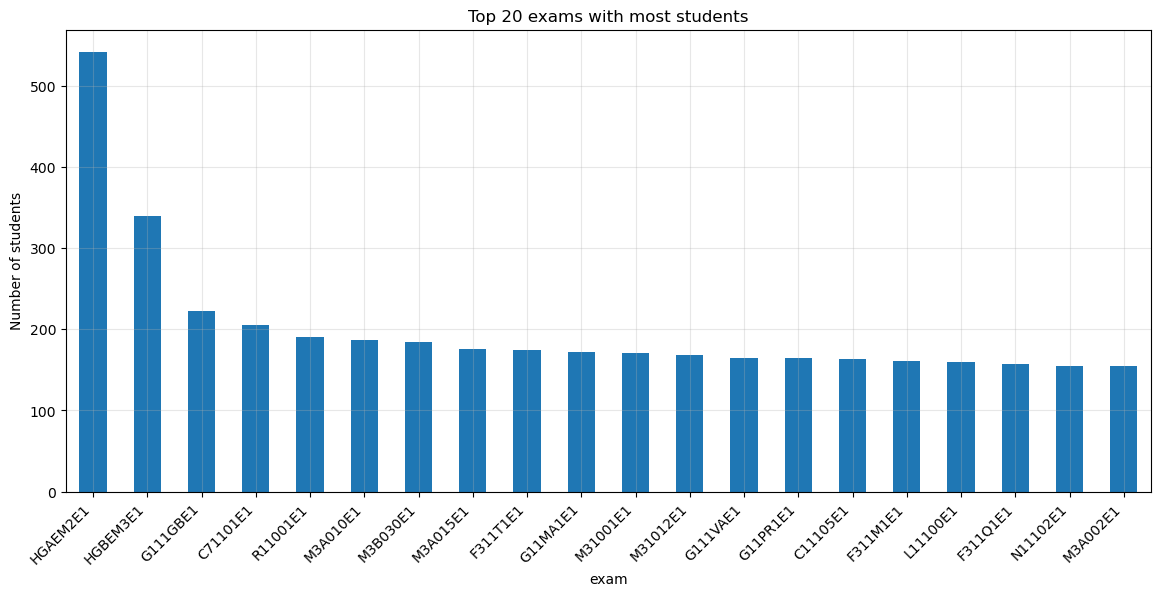

In [6]:
top_k = 20

plt.figure(figsize=(14,6))
exam_counts.head(top_k).plot(kind="bar")
plt.ylabel("Number of students")
plt.title(f"Top {top_k} exams with most students")
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.show()

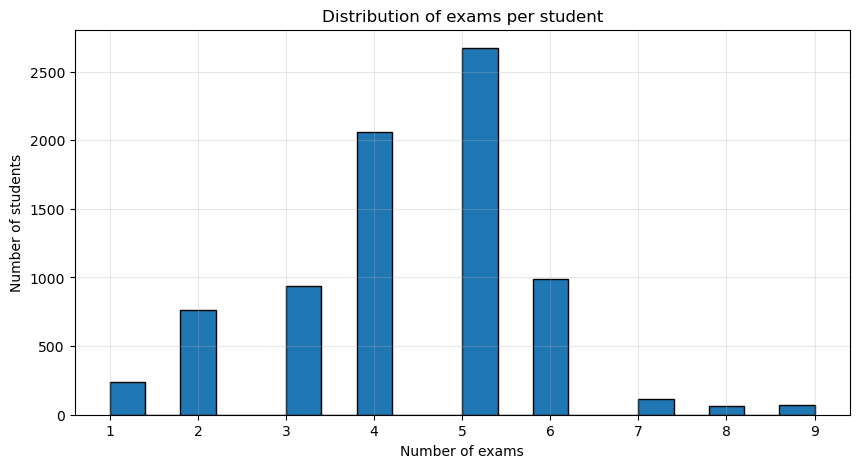

In [7]:
# calculate exams per student
exams_per_student = enrolments.groupby("student")["exam"].nunique()

plt.figure(figsize=(10,5))
plt.hist(exams_per_student, bins=20, edgecolor='black')
plt.xlabel("Number of exams")
plt.ylabel("Number of students")
plt.title("Distribution of exams per student")
plt.grid(alpha=0.3)
plt.show()


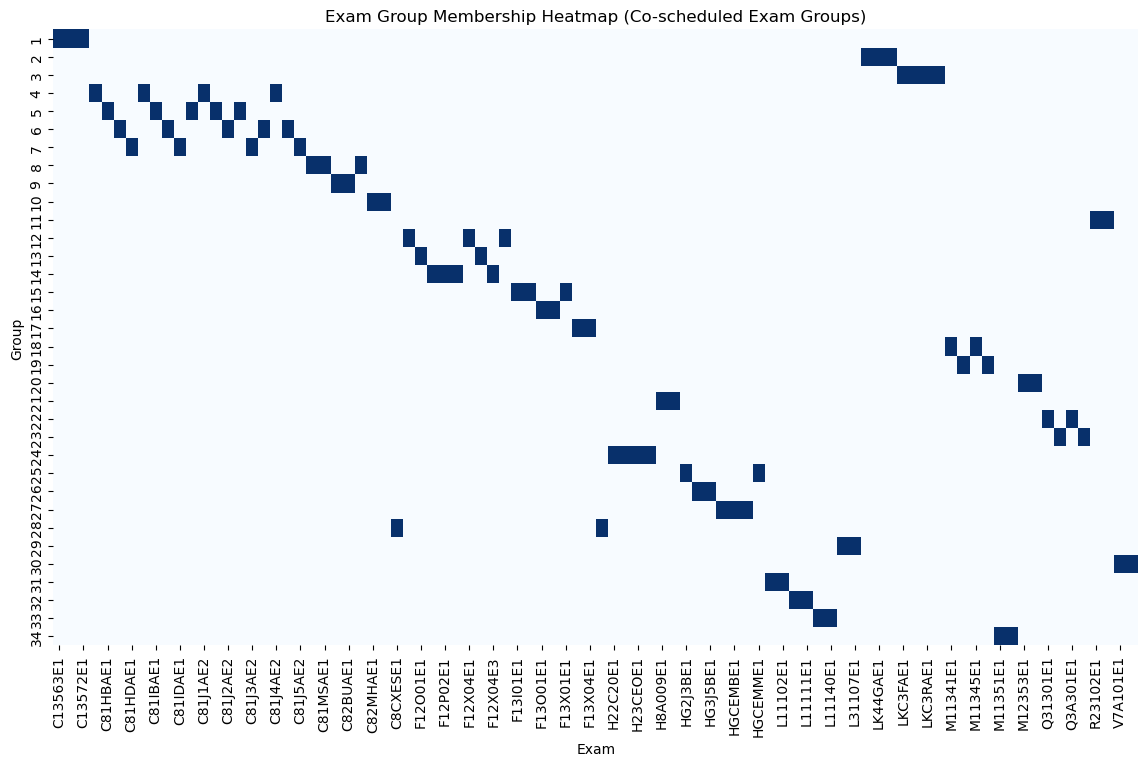

In [8]:
# create heatmap for exam conflict matrix (to see the exams that need to be at the same time)

# convert string → list
coincidences['exams'] = coincidences['exams'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# list all exams
all_exams = sorted({exam for row in coincidences['exams'] for exam in row})

# now index is group
groups = coincidences.index

# create binary matrix
matrix = pd.DataFrame(0, index=groups, columns=all_exams)

for group, row in coincidences.iterrows():
    for exam in row['exams']:
        matrix.loc[group, exam] = 1

plt.figure(figsize=(14,8))
sns.heatmap(matrix, cmap="Blues", cbar=False)
plt.title("Exam Group Membership Heatmap (Co-scheduled Exam Groups)")
plt.xlabel("Exam")
plt.ylabel("Group")
plt.show()


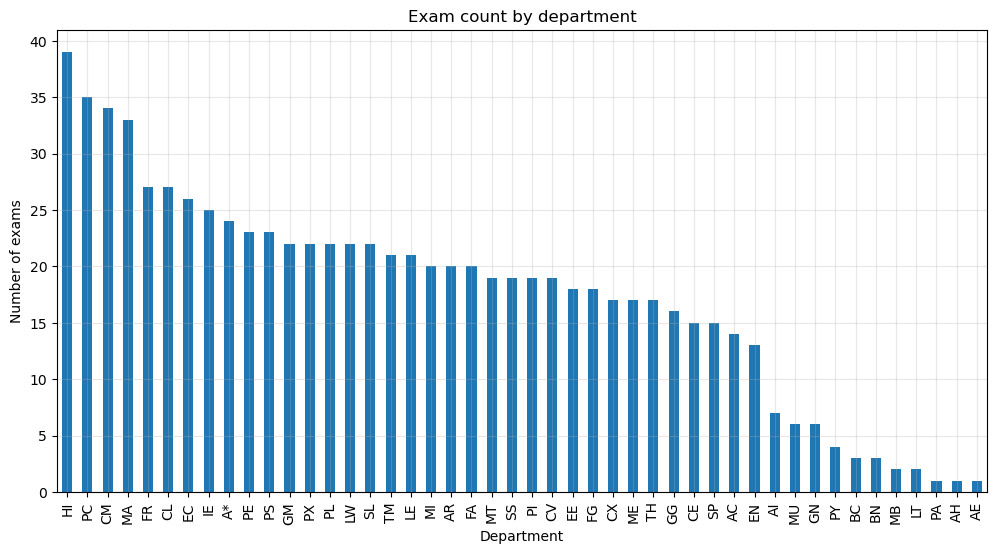

In [ ]:
plt.figure(figsize=(12,6))
exams['dept'].value_counts().plot(kind='bar')
plt.xlabel("Department")
plt.ylabel("Number of exams")
plt.title("Exam count by department")
plt.grid(alpha=0.3)
plt.show()

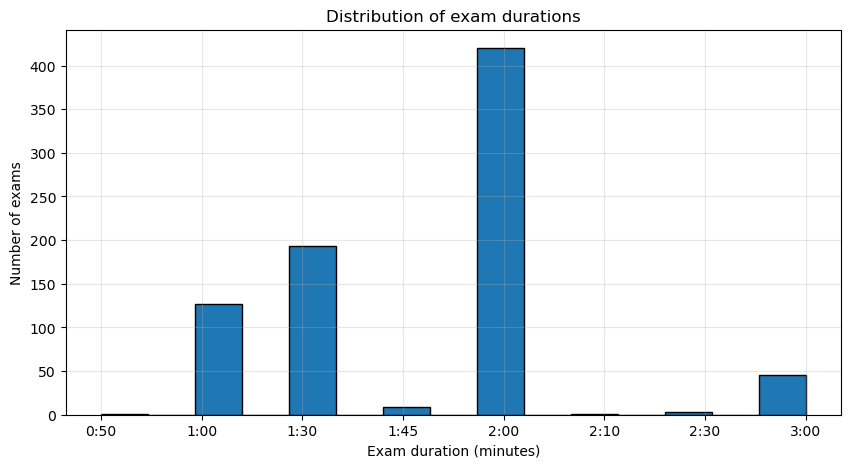

'M11451E1'

In [20]:
# Helper function: convert exam duration from hh:mm to minutes
def parse_duration(time_str):
    h, m = time_str.split(":")
    return int(h) * 60 + int(m)

# Converting hours to mins
exams["duration_minutes"] = exams["duration"].apply(parse_duration)
# duration (dict): the mapping from exam -> duration (mins)

duration = exams.set_index("exam")["duration_minutes"].to_dict()
exams

plt.figure(figsize=(10,5))
plt.hist(exams['duration'].sort_values(), bins=15, edgecolor='black')
plt.xlabel("Exam duration (minutes)")
plt.ylabel("Number of exams")
plt.title("Distribution of exam durations")
plt.grid(alpha=0.3)
plt.show()

exam


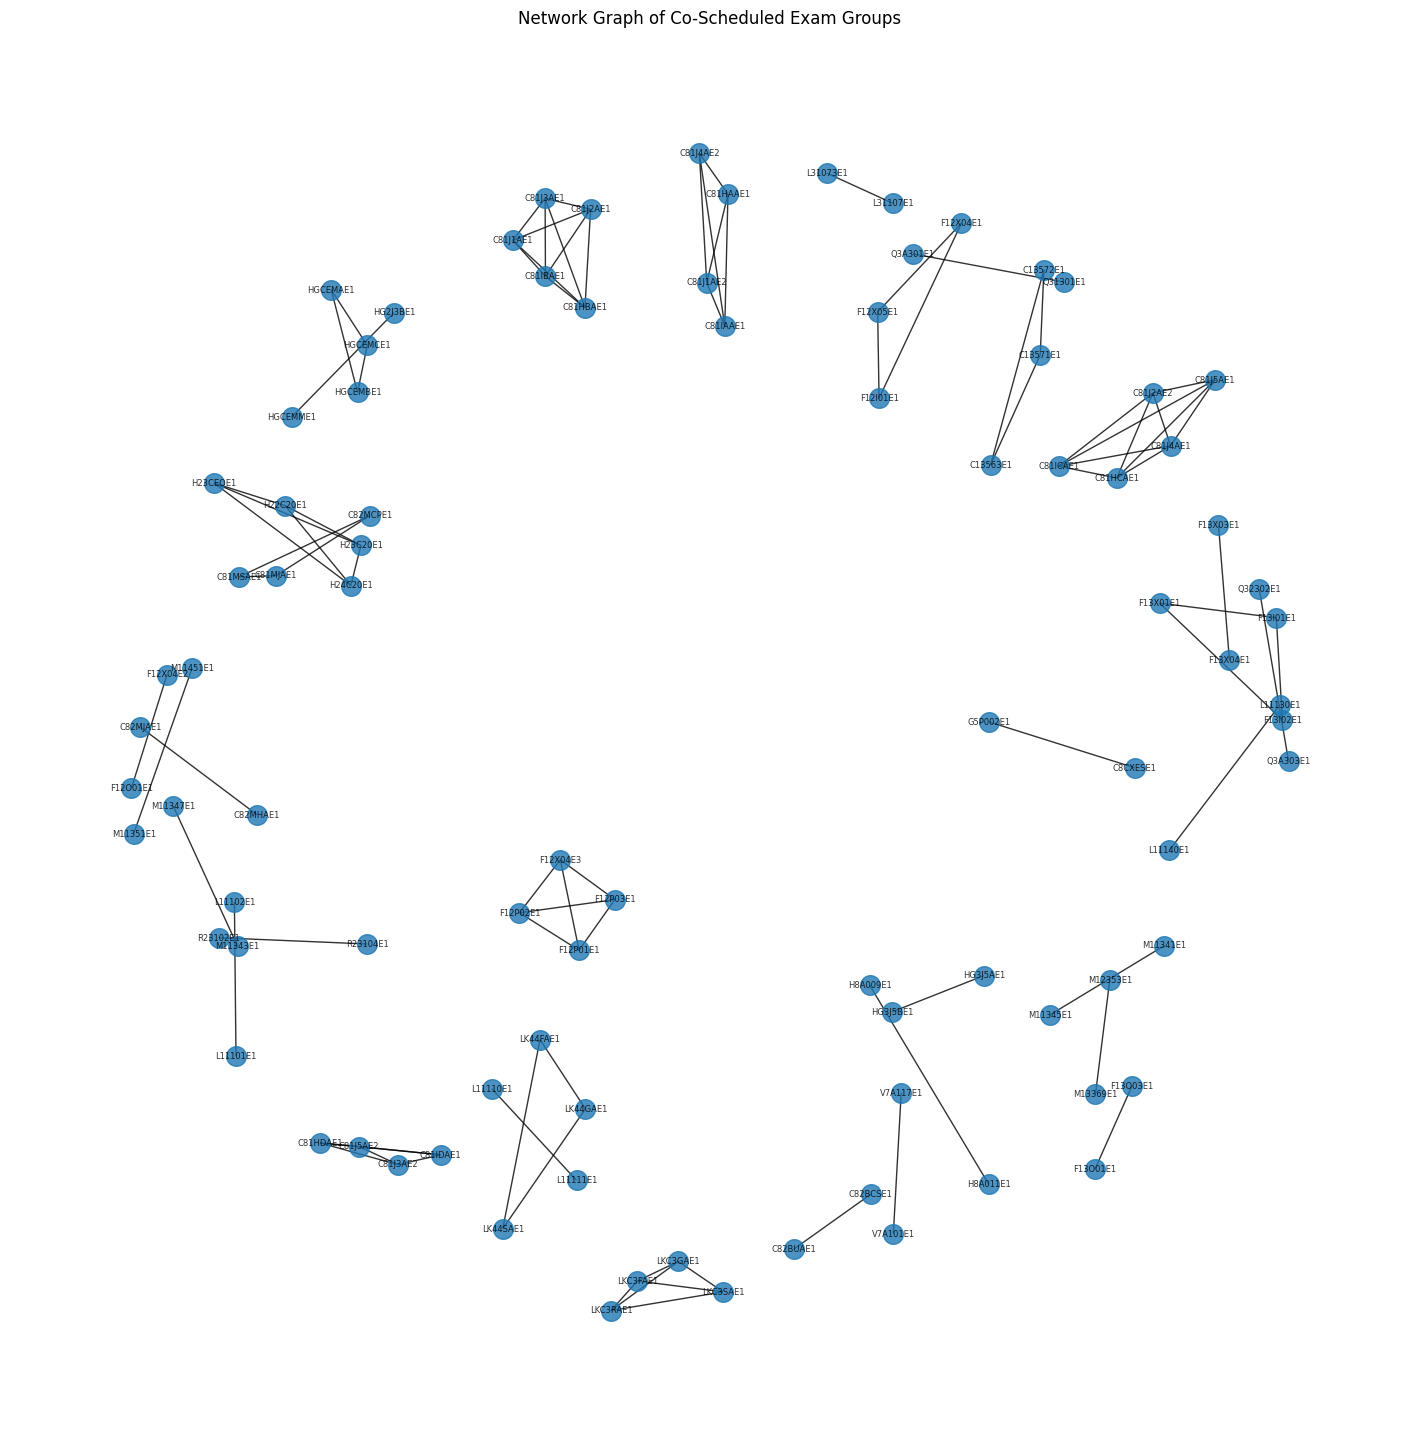

In [ ]:
import ast

co_groups = pd.read_csv(ROOT / "converted-data" / "coincidences.csv")

# Convert string "['A','B']" → Python list ['A','B']
co_groups['exams'] = co_groups['exams'].apply(ast.literal_eval)
import networkx as nx

G = nx.Graph()

# Add nodes
for group_list in co_groups['exams']:
    for exam in group_list:
        G.add_node(exam)

# Add edges: connect all exams in the same group
for group_list in co_groups['exams']:
    for i in range(len(group_list)):
        for j in range(i+1, len(group_list)):
            G.add_edge(group_list[i], group_list[j])
plt.figure(figsize=(14,14))
pos = nx.spring_layout(G, k=0.4)
nx.draw(G, pos,
        node_size=200,
        with_labels=True,
        font_size=6,
        alpha=0.8)

plt.title("Network Graph of Co-Scheduled Exam Groups")
plt.show()

